# Hand-written digit recongtion with MNIST dataset

## Import libraries

In [129]:
import warnings
import itertools

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

from tensorflow.keras.utils import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint



import tensorflow as tf
import matplotlib.pyplot as plt



## Project Variables 

In [130]:
# Files path 
project_root = '/projects/download/data'
train_file = 'train.csv'
test_file = 'test.csv'


## Load data

In [131]:
# Load train data
train_data = pd.read_csv('{}/processed/labels/{}'.format(project_root, train_file), names=["filename", "label"])

# Load test data
test_data = pd.read_csv('{}/processed/labels/{}'.format(project_root, test_file), names=["filename", "label"])

# Define labels 
train_labels = train_data['label']
test_labels = test_data['label']

## Load and reshape images

In [132]:
'''
Re-usable function to load images
1. Load images for model use
2. Shape the images to size 28 x 28
3. Map to a single channel
'''
def load_images(dataset):
    return np.array([img_to_array(load_img('{}/processed/images/train/{}'.format(project_root, dataset['filename'][i]), target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(dataset.shape[0]))
              ]).astype('float32')
    

In [133]:
# Load train images
train_images = load_images(train_data)

  0%|          | 0/60000 [00:00<?, ?it/s]

## Data exploration 

### Data distribution for label

<AxesSubplot: title={'center': 'Distribution of labels in train data'}, xlabel='Label', ylabel='Number of records'>

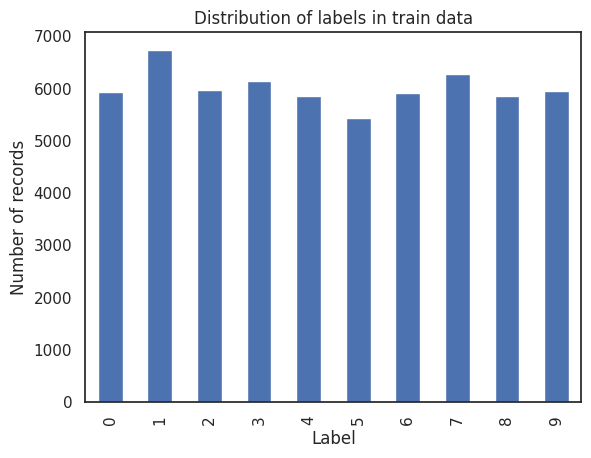

In [134]:
# Explore number of records in train dataset
train_data.groupby(['label'])['label'].count().plot.bar(
    title="Distribution of labels in train data", 
    xlabel="Label",
    ylabel="Number of records"
)


### Plotting sample data

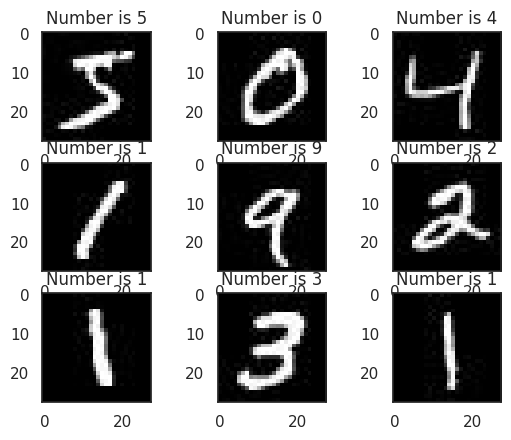

In [135]:
# Plot sample images 
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
	plt.title('Number is {}'.format(train_data['label'][i]))
plt.show()

## Split data - train and test

In [136]:
# Random seed
random_seed = 4034232

# Test size ration
test_size = 0.10

# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    train_images, 
    train_labels, 
    test_size=test_size, 
    random_state=random_seed, 
    stratify=np.array(train_labels))



## Show vector sizes

In [137]:
# Print shape of vectos 
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (54000, 28, 28, 1)
Y_train: (54000,)
X_test:  (6000, 28, 28, 1)
Y_test:  (6000,)


## Normalize data

In [138]:
# normalize the images 
X_train /= 255
X_test /= 255

## Define Model

In [139]:
# Define input shape
input_shape = (28, 28, 1)
# Define output classes
output_class = 10

# Define epochs
epochs=30


# define the model
model = Sequential()
# Adding layers 
# 32 - number of units, 32 filter convolution layer 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation=tf.nn.relu))

model.add(Dropout(0.3))

model.add(Dense(output_class, activation=tf.nn.softmax))

In [140]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_17 (Dense)            (None, 128)              

## Compile Model

In [141]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

## Add callbacks

In [142]:
# Early stopping 
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.000001, patience=4, verbose =1)

# Model Checkpoint
model_checkpoint = ModelCheckpoint('./bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True)


# Callbacks 
callbacks = [early_stopping, model_checkpoint]

## Train Model

In [143]:
hist = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=epochs, 
    validation_split=0.3,
    callbacks=callbacks
)

Epoch 1/30
1181/1182 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9341
Epoch 1: val_accuracy improved from -inf to 0.98019, saving model to ./bestmodel.h5
1182/1182 [==============================] - 15s 12ms/step - loss: 0.2137 - accuracy: 0.9341 - val_loss: 0.0646 - val_accuracy: 0.9802
Epoch 2/30
1179/1182 [============================>.] - ETA: 0s - loss: 0.0719 - accuracy: 0.9780
Epoch 2: val_accuracy improved from 0.98019 to 0.98265, saving model to ./bestmodel.h5
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0554 - val_accuracy: 0.9827
Epoch 3/30
1177/1182 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9844
Epoch 3: val_accuracy improved from 0.98265 to 0.98704, saving model to ./bestmodel.h5
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 4/30
1178/1182 [=====================

## Evaluate model

### Model Accuracy and Test Loss

In [144]:
score = model.evaluate(X_test, y_test)

print('Test loss is ', score[0])
print('Model accuracy is {}'.format(score[1]))


188/188 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9888
Test loss is  0.04343201592564583
Model accuracy is 0.9888333082199097


### Training and validation curves

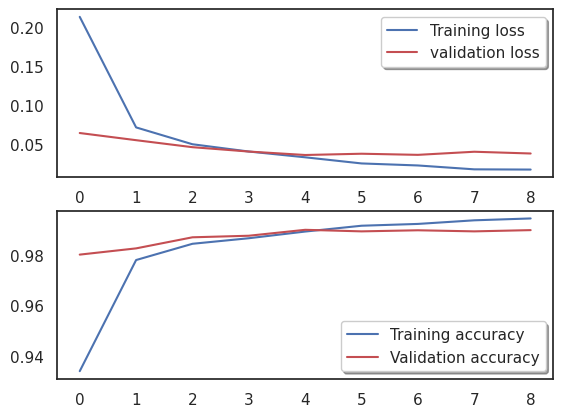

In [145]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


## Accuracy per epoch

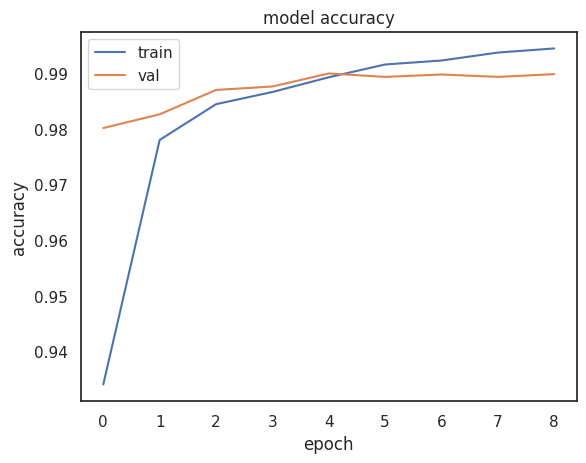

In [146]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Confusion matrix

In [147]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [148]:
# get predictions
y_pred = model.predict(X_test, verbose=2)


188/188 - 1s - 653ms/epoch - 3ms/step


In [149]:
ytrue = y_test.astype(int).tolist()
yhat = np.argmax(y_pred, axis=1).tolist()

conf_matrix = confusion_matrix(ytrue, yhat)


### Un-normalized confusion matrix

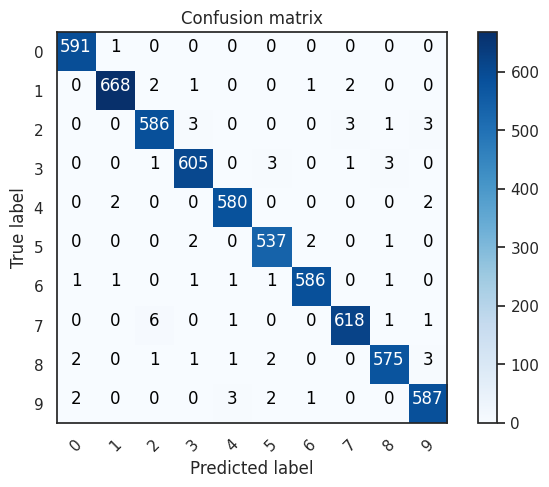

In [150]:
plot_confusion_matrix(conf_matrix, set(np.argmax(y_pred,axis = 1).tolist()))

### Normalized confusion matrix

In [151]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# # define the model
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation=tf.nn.relu))
# model.add(Dropout(0.3))
# model.add(Dense(output_class, activation=tf.nn.softmax))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# def createModel():
#     model = Sequential()
#     # The first two layers with 32 filters of window size 3x3
#     model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(nClasses, activation='softmax'))
    
#     return model

## Compile

In [152]:
# import keras
# from matplotlib import pyplot as plt


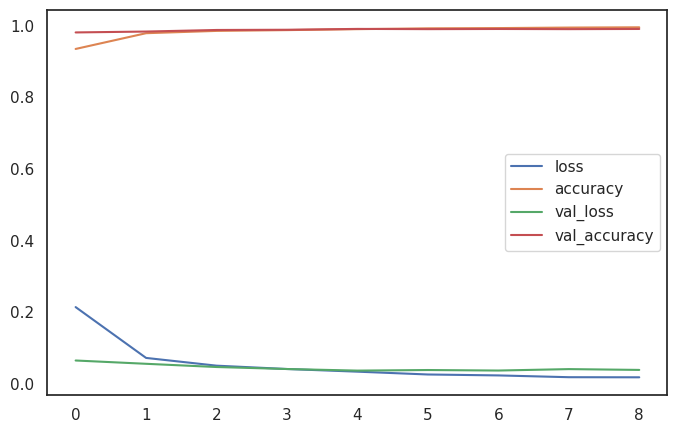

In [153]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

## Train Model

In [154]:
# hist = model.fit(
#     x=X_train, 
#     y=y_train, 
#     batch_size=32, 
#     epochs=30, 
#     validation_data=(X_test, y_test), 
#     validation_split=0.3,
#     callbacks=callbacks
# )


In [155]:
# train the model
# model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

## Evaluate Model

In [156]:
# score = model.evaluate(X_test, y_test)

# print('Model accuracy is {}'.format(score[1]))

In [157]:
# image_index = 10
# # print("Original output:",y_test[image_index])
# plt.imshow(X_test[image_index].reshape(28,28), cmap='Greys')
# pred = model.predict(X_test[image_index].reshape(1,28,28,1))
# print("Predicted output:", pred.argmax())

In [158]:
# image_index = 100
# # print("Original output:",y_test[image_index])
# plt.imshow(X_test[image_index].reshape(28,28), cmap='Greys')
# pred = model.predict(X_test[image_index].reshape(1,28,28,1))
# print("Predicted output:", pred.argmax())

## Gamification 

In [159]:
## using pygame 

## Traning & validation curves

In [160]:
# # compute confusion matrix with `tf` 
# confusion = tf.math.confusion_matrix(
#               labels = ytrue,      # get trule labels 
#               predictions = yhat,  # get predicted labels 
#               num_classes=10)              # no. of classifier 

## Confusion Matrix